In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Summary Stats

In [20]:
D_movie = pd.read_csv("disney_movies.csv")
D_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


&emsp; By running the info() function on the Disney Movie database, I am able to see what type of data is listed in each column. The information gained from this function will allow me to determine which functions I can run in the future, and if any data types need to be changed. For the purposes of this running reports on this data, the release_data column will need to be altered into a date/time type. By shifting this column type I will be able to segment the data by specific date. 

In [21]:
D_movie.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [22]:
D_movie['release_date'] = pd.to_datetime(D_movie['release_date'])

In [23]:
D_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_title               579 non-null    object        
 1   release_date              579 non-null    datetime64[ns]
 2   genre                     562 non-null    object        
 3   mpaa_rating               523 non-null    object        
 4   total_gross               579 non-null    int64         
 5   inflation_adjusted_gross  579 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 27.3+ KB


&emsp; Running the info() function a second time, shows that the release_date column has successfully shifted from an object type to a datetime type. The ability to segment the data by the date is not possible. 

In [24]:
D_movie.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

By filling in the null values with NA we are essecially settin up the database to allow us to either drop the NA valeus when necessary or segment them into their own category to be able to run analysis on the data without the NA's effecting our results.  The isnull().sum() function will allow us to count the total number of null values within each column. The two columns that contain null values are the genre and mpaa_rating columns. This can mean that are database needs to be cleaned/ updated and those values might need to be dropped to develope accurate information. 

In [25]:
D_movie['mpaa_rating'] = D_movie['mpaa_rating'].fillna('N/A')

In [26]:
D_movie['genre'] = D_movie['genre'].fillna('N/A')

In [27]:
D_movie.isnull().sum()

movie_title                 0
release_date                0
genre                       0
mpaa_rating                 0
total_gross                 0
inflation_adjusted_gross    0
dtype: int64

&emsp; By filling in the null values with NA we are essecially settin up the database to allow us to either drop the NA valeus when necessary or segment them into their own category to be able to run analysis on the data without the NA's effecting our results. 

## Data Description Grouped by Genre 

In [28]:
D_movie.groupby('genre').describe()

total_gross                                          \
                          count          mean           std         min   
genre                                                                     
Action                     40.0  1.046141e+08  1.400622e+08         0.0   
Adventure                 129.0  1.270471e+08  1.421435e+08      2815.0   
Black Comedy                3.0  3.251440e+07  1.803695e+07  17105219.0   
Comedy                    182.0  4.461329e+07  4.555087e+07     45779.0   
Concert/Performance         2.0  5.172823e+07  1.916761e+07  38174685.0   
Documentary                16.0  1.129285e+07  1.028833e+07     20521.0   
Drama                     114.0  3.602608e+07  3.879405e+07         0.0   
Horror                      6.0  1.451148e+07  9.377734e+06   4877567.0   
Musical                    16.0  7.233026e+07  6.515831e+07   5632086.0   
N/A                        17.0  6.943942e+06  1.036352e+07         0.0   
Romantic Comedy            23.0  5.009595e+07  4.947553e+07    468240.0   
Thriller/Suspense          24.0  5.861694e+07  7.089503e+07   2154540.0   
Western                     7.0  5.128735e+07  2.737498e+07   8247627.0   

                                                                         \
                             25%         50%           75%          max   
genre                                                                     
Action               28500644.00  43315244.5  1.056915e+08  623279547.0   
Adventure            24103594.00  65000000.0  2.008219e+08  936662225.0   
Black Comedy         22594788.00  28084357.0  4.021900e+07   52353636.0   
Comedy               13965615.50  26923500.5  6.248318e+07  244082982.0   
Concert/Performance  44951459.00  51728233.0  5.850501e+07   65281781.0   
Documentary           1122075.50   9688331.0  1.726530e+07   32011576.0   
Drama                 7928559.00  19730097.0  5.695889e+07  201151353.0   
Horror                6386971.75  13439137.5  2.188952e+07   26570463.0   
Musical              23016824.25  53041787.5  9.992016e+07  218951625.0   
N/A                    229128.00   3218882.0  4.496583e+06   35841901.0   
Romantic Comedy      15282912.50  32680633.0  6.428737e+07  178406268.0   
Thriller/Suspense    17989472.00  28153827.0  7.624449e+07  293506292.0   
Western              39455713.50  56932305.0  6.280899e+07   89302115.0   

                    inflation_adjusted_gross                              \
                                       count          mean           std   
genre                                                                      
Action                                  40.0  1.374734e+08  1.453101e+08   
Adventure                              129.0  1.903974e+08  2.546016e+08   
Black Comedy                             3.0  5.224349e+07  2.418967e+07   
Comedy                                 182.0  8.466773e+07  1.226476e+08   
Concert/Performance                      2.0  5.741084e+07  2.720403e+07   
Documentary                             16.0  1.271803e+07  1.133772e+07   
Drama                                  114.0  7.189302e+07  1.461092e+08   
Horror                                   6.0  2.341385e+07  1.393028e+07   
Musical                                 16.0  6.035979e+08  1.346573e+09   
N/A                                     17.0  2.162373e+07  3.684336e+07   
Romantic Comedy                         23.0  7.777708e+07  7.985530e+07   
Thriller/Suspense                       24.0  8.965379e+07  1.121188e+08   
Western                                  7.0  7.381571e+07  3.637939e+07   

                                                                         \
                            min          25%          50%           75%   
genre                                                                     
Action                      0.0  44252996.25   69012064.5  1.889025e+08   
Adventure                2984.0  48114115.00  102254492.0  2.562634e+08   
Black Comedy         28392

&emsp; The describe() functions produces a statistical summary table for each column within the data frame. It gives values for count, mean, standard deviation, min, max, 25th, 50th, and 75th percentiles. For this table the data is groped by genre, to deliver the summary stats for each genre in the database. One interesting value to note is the standard deviation for Horror movies' total gross revenue which is about 9.37. This can indicate that the potential revenue for Disney Horror movies are more sparce and essencially harder to predict which will be the most successful. The Highest total Disney movies are Musicals, while the highest adjusted grossing movies are Thriller/Suspense. Based on the output the most popular genre is comedy with a count of 182 movies. The comedy genre produces an average of 4.46 million dollars in gross revenue and 8.47 million in inflation adjusted gross revenue. The two most dependable genre's are Drama and Comedy, with the highest counts, decent means for total gross, and low standard deviations. This hints at these two genres being easier to determine what will make them successful. 

## Data Description Grouped by Rating 

In [29]:
D_movie.groupby('mpaa_rating').describe()

total_gross                                                      \
                  count          mean           std        min          25%   
mpaa_rating                                                                   
G                  86.0  9.209061e+07  9.203581e+07  6197866.0  25788482.50   
N/A                56.0  1.529940e+07  1.204006e+07        0.0   5342757.25   
Not Rated           3.0  5.046259e+07  7.926324e+07   314000.0   4772384.50   
PG                187.0  7.362521e+07  8.311639e+07     2815.0  20184496.50   
PG-13             145.0  8.118074e+07  1.311012e+08    48658.0  13906394.00   
R                 102.0  2.936536e+07  3.397795e+07    34368.0   7262560.25   

                                                   inflation_adjusted_gross  \
                    50%           75%          max                    count   
mpaa_rating                                                                   
G            65140890.5  1.183511e+08  422780140.0                     86.0   
N/A          12967996.0  2.404950e+07   48775599.0                     56.0   
Not Rated     9230769.0  7.553688e+07  141843000.0                      3.0   
PG           50047179.0  9.046539e+07  486295561.0                    187.0   
PG-13        32680633.0  7.454171e+07  936662225.0                    145.0   
R            19168928.5  3.840063e+07  178406268.0                    102.0   

                                                                              \
                     mean           std        min          25%          50%   
mpaa_rating                                                                    
G            2.912610e+08  6.695404e+08  7895708.0  34877411.25  103154765.5   
N/A          5.818661e+07  8.492814e+07        0.0  11887242.25   32106907.0   
Not Rated    2.998734e+08  4.276235e+08   426246.0  55003946.00  109581646.0   
PG           1.015414e+08  9.541297e+07     2984.0  33929468.50   69055550.0   
PG-13        1.029486e+08  1.425759e+08    51988.0  24333094.00   51373912.0   
R            5.530581e+07  6.703513e+07    65543.0  11389444.00   31587673.5   

                                         
                      75%           max  
mpaa_rating                              
G            2.578370e+08  5.228953e+09  
N/A          7.121586e+07  5.282800e+08  
Not Rated    4.495970e+08  7.896123e+08  
PG           1.373198e+08  4.862956e+08  
PG-13        9.735658e+07  9.366622e+08  
R            6.710912e+07  3.563898e+08

&emsp; Running the describe function on the data when grouped by rating allows us to see the summary statistics for each rating that Disney produces. Disney mostly produces moves taht fall into the PG and PG-13 rating. The highest total grossing rating is the G rating, however with the low count and higher standard deviation, it doesn't flag as a very consistent rating. The PG-13 rating is the second highest total grossing rating and has the lowest standard deviation, making it a profitable and consistently performing rating. A PG-13 rating also attracts a wider customer base by not limiting large populations of people. Families would still be willing to attend a PG-13 film, while G rated movies are targeted towards children and R is only for adults.  

## Top 5 Highest Total Grossing Films 

In [30]:
Highest_Tgross = D_movie.sort_values('total_gross', ascending=False).head(5)

In [31]:
Highest_Tgross

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225
524,The Avengers,2012-05-04,Action,PG-13,623279547,660081224
578,Rogue One: A Star Wars Story,2016-12-16,Adventure,PG-13,529483936,529483936
571,Finding Dory,2016-06-17,Adventure,PG,486295561,486295561
558,Avengers: Age of Ultron,2015-05-01,Action,PG-13,459005868,459005868


## Lowest 5 Total Grossing Films 

In [32]:
Lowest_Tgross = D_movie.sort_values('total_gross', ascending=True).head(5)
Lowest_Tgross

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
27,Amy,1981-03-20,Drama,N/A,0,0
20,The Many Adventures of Winnie the Pooh,1977-03-11,N/A,N/A,0,0
29,Condorman,1981-08-07,Action,N/A,0,0
355,Frank McKlusky C.I.,2002-01-01,N/A,N/A,0,0
511,Zokkomon,2011-04-22,Adventure,PG,2815,2984


## Top 5 Highest Adjusted Grossing Films 

In [33]:
Highest_Agross = D_movie.sort_values('inflation_adjusted_gross', ascending=False).head(5)
Highest_Agross

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515


## Lowest 5 Adjusted Grossing Films 

In [34]:
Lowest_Agross = D_movie.sort_values('inflation_adjusted_gross', ascending=True).head(5)
Lowest_Agross

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
27,Amy,1981-03-20,Drama,N/A,0,0
20,The Many Adventures of Winnie the Pooh,1977-03-11,N/A,N/A,0,0
355,Frank McKlusky C.I.,2002-01-01,N/A,N/A,0,0
29,Condorman,1981-08-07,Action,N/A,0,0
511,Zokkomon,2011-04-22,Adventure,PG,2815,2984


&emsp; For both bottom five list for total gross and adjusted gross films the five moveis that performed the worst are the same, no matter the type of gross that it used to distinguish them. For both list as well several of the movies have empty values for several columns. This is where dropping NA data entries would change the result of our query. <p>
&emsp;For the top 5 highest total grossing films and adjusted grossing films their list varies greatly. For example the highest toal grossing film is Star Wars Episode VII, while the higest adjusted grossing film is Snow White and the Seven Dwarfs. Snow White was Disney's first film ever produced and set the foundation for Disney to develope into what it is today. As each year progressed the value of the dollar dropped due to inflation making the cost to view films greated inflating the gross values for films that were released in more current years.    

Text(0, 0.5, 'Total Gross in Millions')

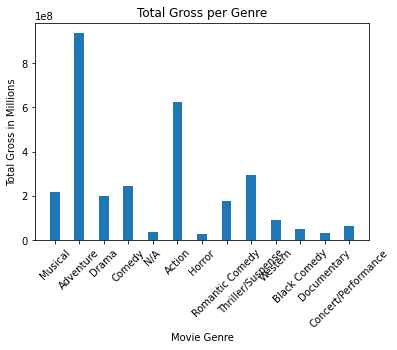

In [35]:
bar = plt.bar(D_movie['genre'], D_movie['total_gross'], width = 0.4)
plt.xticks(rotation = 45)
plt.title('Total Gross per Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Total Gross in Millions')

&emsp; This bar plot gives us a visual of the total gross dollars for each gener of movie that Disney has produced. In terms of total grossing dollars the more profitable genre is adventure film. This can been seen with the blockbuster hits like the Starwars Franchise and Finding Dory, which both make apparences in the top 5 highest grossing films list. 

## Segmentation and Targeting

In [36]:
fs =pd.read_csv("family_segments.csv")
print(fs)

      hhold_ID  est_net_worth  est_inc  domestic  number_visits  \
0            1           7525     7825         1              0   
1            2         639815   449775         1              1   
2            3         288847   204750         1              6   
3            4         191791   136730         1              1   
4            5          96527    72165         0              3   
...        ...            ...      ...       ...            ...   
9245      9246         129634    95375         1              1   
9246      9247        5039615  3526325         1              8   
9247      9248         259279   184580         1              0   
9248      9249          43471    33375         1              1   
9249      9250         184765   134550         1              2   

      number_children  oldest_child_age  dis_plus_sub  online_merch_avg  \
0                   2               9.0             0             826.0   
1                   2              11.0      

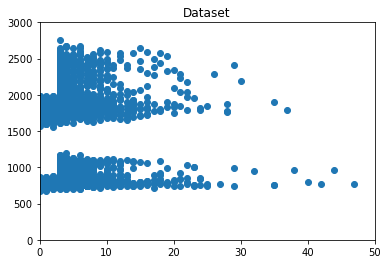

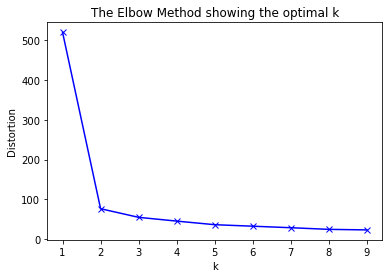

In [37]:
#Elbow chart. 

#a. 
  

from sklearn.cluster import KMeans

from sklearn import metrics
from scipy.spatial.distance import cdist
x1=fs['number_visits']
x2=fs['online_merch_avg']

plt.plot()
plt.xlim([0, 50])
plt.ylim([0, 3000])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [38]:
#Build a k-means model with desired number of clusters. 



from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

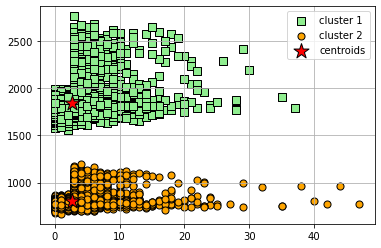

In [39]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

&emsp; For the first visualization, I chose to use symbol maps to shows the relationship between the number of visits and the oldest child age. From the map I saw that the family with child age of 12 visits the most with 4,721 times. And with the child age of 5 visits the least. I think the reason may be there are not many rides and events available for the child age of 5. <p>
&emsp; For the second visualization, I chose to use bar graph to see the relationship between number of children and the sum of estimated income. From the graph, I see the family with two children has the highest estimated income. And the family with 7 children creates the lowest estimated income. The result may be the high price on the ticket and purchase in the park. <p>
&emsp;For the third visualization, I chose to use symbol map to shows the relationship between the domestic and the sum of estimated net worth. It shows that the domestic traveler will create more net worth vs. the international traveler. <p>
&emsp;For the last visualization, I chose to use the heat map to show the relationship between the number of children and the sum of online merchant sales. As result, the family with two children has the highest sale of online merchandise with is 4,017,112. And the family with 7 children has the lowest sale on online merchandise. <p>


&emsp; For the cluster model, I have set online merchandise for the y-axis, and number of visits for x-axis. As shown in the graph, cluster 2 has higher sale of online merchandise but with the less number of visit. Thus, I believe we should targeting on online merchandise more since the centroids are much higher for cluster 2 than cluster 1. <p>

## Conjoint Analysis

In [55]:
rank_data =pd.read_csv("amenity_costs.csv")
ac=pd.read_csv("amenity_costs.csv")

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import preprocessing

print(ac)

         Amenity          Level  \
0   WiFi_Network          Basic   
1   WiFi_Network         Strong   
2   WiFi_Network  Best in Class   
3      breakfast           None   
4      breakfast    Continental   
5      breakfast    Full Buffet   
6        parking          Valet   
7        parking       Open Lot   
8            gym           None   
9            gym          Basic   
10           gym       Advanced   
11           gym          Super   
12    flex_check             No   
13    flex_check            Yes   
14   shuttle_bus             No   
15   shuttle_bus            Yes   
16      air_pure             No   
17      air_pure            Yes   
18       jacuzzi             No   
19       jacuzzi            Yes   
20      VIP_shop             No   
21      VIP_shop            Yes   
22     pool temp             76   
23     pool temp             80   
24     pool temp             84   

    Estimated Incremental Cost,\nPer Visitor/Per Night  
0                               

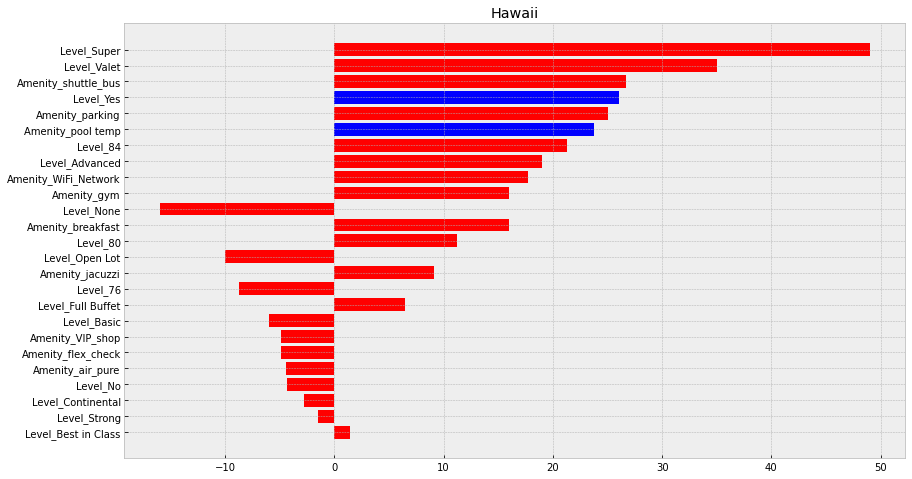

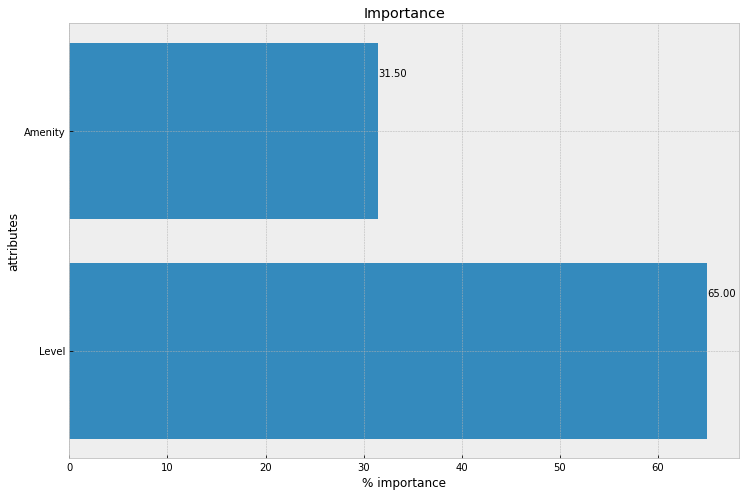

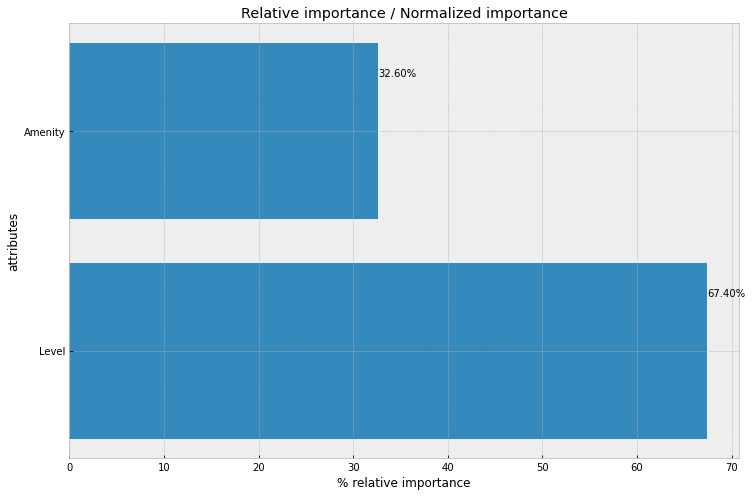

In [56]:
y = ac['Estimated Incremental Cost,\nPer Visitor/Per Night']
x = ac[[x for x in ac.columns if x != 'Estimated Incremental Cost,\nPer Visitor/Per Night']]

dum = pd.get_dummies(x, columns=[c for c in x.columns if c !='Estimated Incremental Cost,\nPer Visitor/Per Night'])
dum.head()

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
res = sm.OLS(y, dum, family=sm.families.Binomial()).fit()
res.summary()

ac_res = pd.DataFrame({
    'parameter_name': res.params.keys()
    , 'parameter': res.params.values
    , 'p-val': res.pvalues
})
# adding field for absolute of parameters
ac_res['abs_parameter'] = np.abs(ac_res['parameter'])
# marking field is significant under 95% confidence interval
ac_res['is_sig_95'] = (ac_res['p-val'] < 0.05)
# constructing color naming for each param
ac_res['c'] = ['blue' if x else 'red' for x in ac_res['is_sig_95']]

# make it sorted by abs of parameter value
ac_res = ac_res.sort_values(by='abs_parameter', ascending=True)

f, ax = plt.subplots(figsize=(14, 8))
plt.title('Hawaii')
pwu = ac_res['parameter']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=ac_res['c'])
plt.yticks(xbar, labels=ac_res['parameter_name'])
plt.show()

# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict()
for key, coeff in res.params.items():
    sk =  key.split('_')
    feature = sk[0]
    if len(sk) == 1:
        feature = key
    if feature not in range_per_feature:
        range_per_feature[feature] = list()
        
    range_per_feature[feature].append(coeff)

# importance per feature is range of coef in a feature
# while range is simply max(x) - min(x)
importance_per_feature = {
    k: max(v) - min(v) for k, v in range_per_feature.items()
}

# compute relative importance per feature
# or normalized feature importance by dividing 
# sum of importance for all features
total_feature_importance = sum(importance_per_feature.values())
relative_importance_per_feature = {
    k: 100 * round(v/total_feature_importance, 3) for k, v in importance_per_feature.items()
}


alt_data = pd.DataFrame(
    list(importance_per_feature.items()), 
    columns=['attr', 'importance']
).sort_values(by='importance', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Importance')
plt.barh(xbar, alt_data['importance'])
for i, v in enumerate(alt_data['importance']):
    ax.text(v , i + .25, '{:.2f}'.format(v))
plt.ylabel('attributes')
plt.xlabel('% importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()

alt_data = pd.DataFrame(
    list(relative_importance_per_feature.items()), 
    columns=['attr', 'relative_importance (pct)']
).sort_values(by='relative_importance (pct)', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Relative importance / Normalized importance')
plt.barh(xbar, alt_data['relative_importance (pct)'])
for i, v in enumerate(alt_data['relative_importance (pct)']):
    ax.text(v , i + .25, '{:.2f}%'.format(v))
plt.ylabel('attributes')
plt.xlabel('% relative importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()

&emsp;From the conjoint model, I have see how price in each category affect on amenity category. For example, the pool has three different choices with different price. The price will affect on how people’s pool selection. 

## Forecasting Net Income


Modified file:
          Date  Year
0    9/30/2021   159
1    6/30/2021   918
2    3/31/2021   901
3   12/31/2020    17
4    9/30/2020  -710
5    6/30/2020 -4721
6    3/31/2020   460
7   12/31/2019  2107
8    9/30/2019  1054
9    6/30/2019  1760
10   3/31/2019  5452
11  12/31/2018  2788
12   9/30/2018  2322
13   6/30/2018  2916
14   3/31/2018  2937
15  12/31/2017  4423
16   9/30/2017  1747
17   6/30/2017  2366
18   3/31/2017  2388
19  12/31/2016  2479
20   9/30/2016  1771
21   6/30/2016  2597
22   3/31/2016  2143
23  12/31/2015  2880
24   9/30/2015  1609
25   6/30/2015  2483
26   3/31/2015  2108
27  12/31/2014  2182
28   9/30/2014  1499
29   6/30/2014  2245
30   3/31/2014  1917
31  12/31/2013  1840
32   9/30/2013  1394
33   6/30/2013  1847
34   3/31/2013  1513
35  12/31/2012  1382
36   9/30/2012  1244
37   6/30/2012  1831
38   3/31/2012  1143
39  12/31/2011  1464
40   9/30/2011  1087
41   6/30/2011  1476
42   3/31/2011   942
43  12/31/2010  1302
44   9/30/2010   835
45   6/30/2010  13

<AxesSubplot:xlabel='Date'>

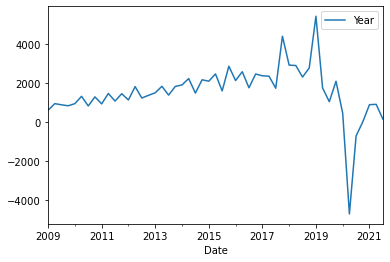

In [40]:
# Import the data
dfy = pd.read_csv('Disney Financial by year.csv')
headerList = ['Date', 'Year']
dfy.to_csv("Disney Financial by year.csv", header=headerList, index=False)

file = pd.read_csv("Disney Financial by year.csv")
print('\nModified file:')
print(file)

file['Date'] = pd.to_datetime(file['Date'])
# Set the date as index 
file = file.set_index('Date')

file['Year'].astype(str).astype(int)

file.plot()

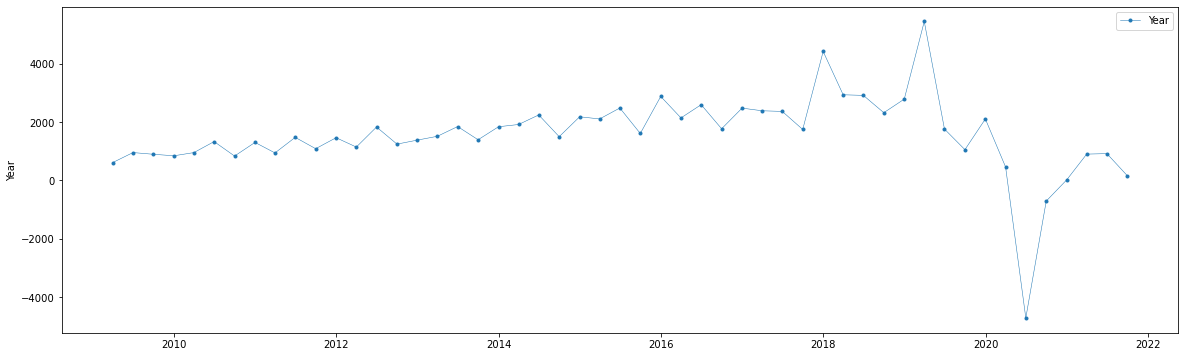

In [41]:
import warnings
y = file['Year']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Year')
ax.set_ylabel('Year')
ax.legend();

In [42]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random
# contrived dataset
data = file['Year']
# fit model
model = AutoReg(data, lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

51    1099.668808
dtype: float64


C:\Users\rannt\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1Q-DEC will be used.
  warnings.warn('No frequency information was'
C:\Users\rannt\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\rannt\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\rannt\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available

&emsp; From the data I found online, the graph that I created shows the forecast from roughly 2010 to 2022. And it has showed the drop in 2020, I believe the significant drop caused by COVID-19. But as the vaccine and mask enforced, the revenue starts to grow back. Since I only used one data to create the simple graph, it will be an estimated forecast. <p>

## <b> Classification  <b>

In [43]:
cruise_return = pd.read_csv("cruise_returners.csv")
cruise_return.head()
cr = cruise_return.drop('hhold_ID',1)
cr.head()

,discount_original,coupon_received,cabin_type,est_inc,season_of_year,ticket_spend,cruise_theme,incidental_spending,park_package,embark_port,res_to_port,number_children,oldest_child_age,dis_plus_sub,return_1065
0,1,1,Verandah,19280.985,Winter,2649,prin_fro,2898.754343,1,Vancouver,558,3,6.0,1,0
1,1,0,Concierge,825719.960,Spring,2941,Star Wars,2898.754343,1,Port Canaveral,280,3,8.0,1,0
2,1,0,Oceanview,3755246.459,Fall,2609,Marvel,11750.829364,1,Port Canaveral,351,3,3.0,1,0
3,1,1,Oceanview,96831.550,Winter,2367,Marvel,13945.343512,1,Copenhagen,314,3,7.0,0,0
4,1,0,Verandah,11027.249,Spring,3021,Marvel,2898.754343,1,Copenhagen,342,4,10.0,1,0


In [44]:
nulls=cr.isnull().sum()
print(nulls)

discount_original         0
coupon_received           0
cabin_type                0
est_inc                   0
season_of_year            0
ticket_spend              0
cruise_theme           1250
incidental_spending       0
park_package              0
embark_port               0
res_to_port               0
number_children           0
oldest_child_age        370
dis_plus_sub              0
return_1065               0
dtype: int64


In [45]:
print(cr.oldest_child_age.value_counts(ascending = True))

18.0    202
2.0     223
15.0    401
9.0     412
7.0     417
16.0    418
11.0    420
10.0    436
8.0     438
12.0    441
4.0     460
3.0     460
17.0    471
5.0     472
13.0    474
14.0    478
6.0     507
Name: oldest_child_age, dtype: int64


In [46]:
cr['oldest_child_age'].fillna(value='0',inplace=True)
cr['cruise_theme'].fillna(value='None',inplace=True)
nulls=cr.isnull().sum()
print(nulls)

discount_original      0
coupon_received        0
cabin_type             0
est_inc                0
season_of_year         0
ticket_spend           0
cruise_theme           0
incidental_spending    0
park_package           0
embark_port            0
res_to_port            0
number_children        0
oldest_child_age       0
dis_plus_sub           0
return_1065            0
dtype: int64


In [47]:
print(cr.return_1065.value_counts(ascending = True))

1    3600
0    3900
Name: return_1065, dtype: int64


In [48]:
cr2 = cr
from sklearn import preprocessing
CR_LE = preprocessing.LabelEncoder()
CR_LE.fit(cr2['return_1065'])
list(CR_LE.classes_)
cr2['return_1065']= CR_LE.fit_transform(cr2['return_1065']).astype('int64')
cr2.head()

,discount_original,coupon_received,cabin_type,est_inc,season_of_year,ticket_spend,cruise_theme,incidental_spending,park_package,embark_port,res_to_port,number_children,oldest_child_age,dis_plus_sub,return_1065
0,1,1,Verandah,19280.985,Winter,2649,prin_fro,2898.754343,1,Vancouver,558,3,6.0,1,0
1,1,0,Concierge,825719.960,Spring,2941,Star Wars,2898.754343,1,Port Canaveral,280,3,8.0,1,0
2,1,0,Oceanview,3755246.459,Fall,2609,Marvel,11750.829364,1,Port Canaveral,351,3,3.0,1,0
3,1,1,Oceanview,96831.550,Winter,2367,Marvel,13945.343512,1,Copenhagen,314,3,7.0,0,0
4,1,0,Verandah,11027.249,Spring,3021,Marvel,2898.754343,1,Copenhagen,342,4,10.0,1,0


In [49]:
crd = pd.get_dummies(cr2, columns=['cabin_type','season_of_year','cruise_theme','embark_port']
                     ,drop_first = True)
print(crd)
crd.columns

      discount_original  coupon_received      est_inc  ticket_spend  \
0                     1                1    19280.985          2649   
1                     1                0   825719.960          2941   
2                     1                0  3755246.459          2609   
3                     1                1    96831.550          2367   
4                     1                0    11027.249          3021   
...                 ...              ...          ...           ...   
7495                  0                0   169648.634          2070   
7496                  0                1     4089.006          2347   
7497                  1                0    21580.241          3211   
7498                  0                0     1383.850          1691   
7499                  0                0    33521.227          2033   

      incidental_spending  park_package  res_to_port  number_children  \
0             2898.754343             1          558                3   
1

Index(['discount_original', 'coupon_received', 'est_inc', 'ticket_spend',
       'incidental_spending', 'park_package', 'res_to_port', 'number_children',
       'oldest_child_age', 'dis_plus_sub', 'return_1065', 'cabin_type_Inside',
       'cabin_type_Oceanview', 'cabin_type_Verandah', 'season_of_year_Spring',
       'season_of_year_Summer', 'season_of_year_Winter', 'cruise_theme_None',
       'cruise_theme_Princess/Frozen', 'cruise_theme_Star Wars',
       'cruise_theme_prin_fro', 'cruise_theme_starwars',
       'embark_port_Copenhagen', 'embark_port_New York',
       'embark_port_Port Canaveral', 'embark_port_San Diego',
       'embark_port_Vancouver'],
      dtype='object')

In [50]:
x= crd[['discount_original', 'coupon_received', 'est_inc', 'ticket_spend',
       'incidental_spending', 'park_package', 'res_to_port', 'number_children',
       'oldest_child_age', 'dis_plus_sub', 'cabin_type_Inside',
       'cabin_type_Oceanview', 'cabin_type_Verandah', 'season_of_year_Spring',
       'season_of_year_Summer', 'season_of_year_Winter', 'cruise_theme_None',
       'cruise_theme_Princess/Frozen', 'cruise_theme_Star Wars',
       'cruise_theme_prin_fro', 'cruise_theme_starwars',
       'embark_port_Copenhagen', 'embark_port_New York',
       'embark_port_Port Canaveral', 'embark_port_San Diego',
       'embark_port_Vancouver']]

y= crd['return_1065']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.6,
                                                    test_size = 0.40, random_state=489)
scaler = StandardScaler()
normalized_x_train = pd.DataFrame(scaler.fit_transform(x_train),columns = x_train.columns)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
CR_Log = LogisticRegression(random_state=489).fit(normalized_x_train, y_train)
column_labels = normalized_x_train.columns.tolist()
coef = CR_Log.coef_.squeeze().tolist()
labels_coef = list(zip(column_labels, coef))
pd.DataFrame({"Variable":normalized_x_train.columns.tolist(),"Coefficients":CR_Log.coef_[0]})

NameError: name 'StandardScaler' is not defined

In [ ]:
normalized_x_test = pd.DataFrame(scaler.fit_transform(x_test),columns = x_test.columns)
y_pred = CR_Log.predict(normalized_x_test)
from sklearn.metrics import confusion_matrix
CR_CM = confusion_matrix(y_test,y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
Sensitivity = round((1020/(1020+569))*100,2)
Specificity = round((834/(834+577))*100,2)
precision = round((1020/(1020+577))*100,2)
BA = round(((Sensitivity+Specificity)/2),2)
print('Sensitivity is',Sensitivity)
print('Specificity is',Specificity)
print('Precision is',precision)
print('Balanced Accuracy is',BA)

labels = ['True Pos','False Pos','False Neg','True Neg']
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(CR_CM, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

In [ ]:
crr2 = cr
from sklearn import preprocessing
CR_LE2 = preprocessing.LabelEncoder()
CR_LE2.fit(crr2['return_1065'])
list(CR_LE2.classes_)
crr2['return_1065']= CR_LE2.fit_transform(crr2['return_1065']).astype('int64')
crrd = pd.get_dummies(crr2, columns=['cabin_type','season_of_year','cruise_theme','embark_port']
                     ,drop_first = True)
print(crrd)
crrd.columns

In [ ]:
x2= crrd[['discount_original', 'coupon_received', 'est_inc', 'ticket_spend',
       'incidental_spending', 'park_package', 'res_to_port', 'number_children',
       'oldest_child_age', 'dis_plus_sub', 'cabin_type_Inside',
       'cabin_type_Oceanview', 'cabin_type_Verandah', 'season_of_year_Spring',
       'season_of_year_Summer', 'season_of_year_Winter', 'cruise_theme_None',
       'cruise_theme_Princess/Frozen', 'cruise_theme_Star Wars',
       'cruise_theme_prin_fro', 'cruise_theme_starwars',
       'embark_port_Copenhagen', 'embark_port_New York',
       'embark_port_Port Canaveral', 'embark_port_San Diego',
       'embark_port_Vancouver']]
y2= crrd['return_1065']
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2,train_size = 0.6,
                                                        test_size = 0.40, random_state=489)

In [ ]:
normalized_x_train2 = pd.DataFrame(scaler.fit_transform(x_train2),columns = x_train2.columns)
from sklearn.ensemble import RandomForestClassifier
CR_RF2=RandomForestClassifier()
CR_RF2.fit(normalized_x_train,y_train)
print(CR_RF2.get_params())
param_grid1= {
    'n_estimators': [50, 100],
    'max_depth': [2, 4, 6,],
    'max_features': [3, 4, 5],
}
from sklearn.model_selection import GridSearchCV
CR_GS = GridSearchCV(estimator=CR_RF2, param_grid=param_grid1, cv= 5)
CR_GS.fit(normalized_x_train, y_train)
print(CR_GS.best_params_)

In [ ]:
CR_RF2=RandomForestClassifier(n_estimators=100, max_depth=6, max_features=5, random_state=489)
CR_RF2.fit(normalized_x_train,y_train)

In [ ]:
CR_RF_IMP = pd.DataFrame(list(zip(normalized_x_train2,CR_RF2.feature_importances_)))
CR_RF_IMP.columns = ['Importance', 'Importance Rank']
CR_RF_IMP = CR_RF_IMP.sort_values(by='Importance Rank', ascending=False)
CR_RF_IMP

In [ ]:
normalized_x_test2 = pd.DataFrame(scaler.fit_transform(x_test2),columns = x_test2.columns)
y_pred2 = CR_RF2.predict(normalized_x_test2)
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test2,y_pred2)
from sklearn.metrics import classification_report
print(classification_report(y_test2,y_pred2))
Sensitivity1 = round((1022/(1022+464))*100,2)
Specificity1 = round((942/(942+575))*100,2)
precision1 = round((1022/(1022+575))*100,2)
BA1 = round(((Sensitivity1+Specificity1)/2),2)
print('Sensitivity is',Sensitivity1)
print('Specificity is',Specificity1)
print('Precision is',precision1)
print('Balanced Accuracy is',BA1)


labels2 = ['True Pos','False Pos','False Neg','True Neg']
labels2 = np.asarray(labels2).reshape(2,2)
ax2 = sns.heatmap(CR_CM2, annot=labels, fmt='', cmap='Blues')
ax2.set_title('Seaborn Confusion Matrix with labels\n\n');
ax2.set_xlabel('\nPredicted Values')
ax2.set_ylabel('Actual Values ');
ax2.xaxis.set_ticklabels(['False','True'])
ax2.yaxis.set_ticklabels(['False','True'])
plt.show()
from sklearn.metrics import accuracy_score
accuracy_score(y_test2, y_pred2)*100

In [ ]:
Family_A = pd.DataFrame({'discount_original':'1', 'coupon_received':'1', 'est_inc':'19280.985',
                         'ticket_spend':'2649','incidental_spending': '2898.754343', 'park_package':'1',
                         'res_to_port':'558', 'number_children':'3','oldest_child_age': '5',
                         'dis_plus_sub':'1', 'cabin_type_Inside':'0','cabin_type_Oceanview':'0',
                         'cabin_type_Verandah':'1', 'season_of_year_Spring':'0',
                         'season_of_year_Summer':'0', 'season_of_year_Winter':'1',
                         'cruise_theme_None':'0','cruise_theme_Princess/Frozen':'0',
                         'cruise_theme_Star Wars':'0','cruise_theme_prin_fro':'1',
                         'cruise_theme_starwars':'0','embark_port_Copenhagen':'0',
                         'embark_port_New York':'0','embark_port_Port Canaveral':'0',
                         'embark_port_San Diego':'0','embark_port_Vancouver':'1'}, index=[0])

A_Log_Pred = CR_Log.predict(Family_A)
print(A_Log_Pred)
print(CR_Log.predict_proba(Family_A))
A_Log_Pred2 = CR_RF2.predict(Family_A)
print(A_Log_Pred2)
print(CR_RF2.predict_proba(Family_A))

<p>
&emsp; The model above was built with the purpose of predicting whether or not a household would embark on a Disney Cruise after their first voyage. The model was built using cleaned, encoded, dummified, and normalized data. There are two main models, one logistic regression and one random forest. Both have their strengths and weaknesses. For example, the logistic regression model provides insight on the impact of variables and what customers want; however, the model is less accurate when compared to the random forest. 
<p>
&emsp; From a financial and attraction breakdown, the logistic regression model help assess which variables or features had the most impact on a customer's return. For example, cruises with no themes contribute to a customer's return the greatest compared to the other themes; this could be because not many customers have a niche or specific taste, or they want to keep all children happy. Additionally, some variables also provided insight into unexpected situations. For example, the park package, the largest coefficient of all variables, hurts the chances of returning. The park package and discount variables both have the largest impact and are negative. The variables could infer that the discounts and bundles are for first-time buyers only, and families did not find the cruise worthwhile without the discount and bundle. Another feature that pushes return customers away is the cabin types. Every single cabin, except the Verandah, has a negative impact. The Verandah cabin's impact is not enough to justify remodeling all cabins. However, it does point out that the cruise cabins need renovation or new themes. The ocean view cabin hurts the returns the most of all cabins. There can be two reasons for this; one, the cabins are horrendous and not well kept, or two, the cabins are overpriced, and customers did not think the cabin was worth the money at all. Perhaps both. 
<p>
&emsp; The logistic regression provides more information about the type of families the cruises attract. Large families that embark from Vancouver are more likely to return to the cruise based on the coefficient values. Households with older children also negatively impact the return rate. All else equal, the older the children get, the less likely a family will bring them on a cruise; in fact, this is proven by the model's coefficient of -0.196225. One unforeseen variable is the Disney plus subscription holding a negative value. A general assumption would have been that those who consume more Disney products are likely Disney supporters. A potential explanation could be that people hold the streaming service because of the entities Disney has in its possession, such as Marvel and Dreamworks.
<p>
&emsp; The random forest model was used to determine which variables are important to the model's accuracy. The order of importance and the coefficient values are similar, as the more important variables are often the most impactful; the idea is seemingly obvious, but just because a variable has a large coefficient does not mean the inclusion of it matters to the accuracy in the model. The model was also able to correctly classify a customer as a non return, this was done by taking that specifc household and running a prediction on it. The random forest model was overall more accurate and can even be used to help improve the logistic regression by removing the least important variables until a desired level of accuracy is achieved. 

## <b> A/B Testing  <b>

In [51]:
pop = pd.read_csv("popcorn_buckets.csv")
pop.head()

,location,bucket,Q1_sales_USD
0,Disneyland Paris,Cinderella,139413.1
1,Disneyland Paris,Star_Wars,138890.4
2,Disneyland Paris,Mermaid,117696.4
3,Disneyland Paris,MickeySuit,176821.9
4,Disneyland Paris,MickeyEars,168442.1


In [52]:
pop.groupby('bucket').describe()['Q1_sales_USD']

,count,mean,std,min,25%,50%,75%,max
bucket,,,,,,,,
Cinderella,6.0,136139.850000,8362.372118,128031.7,128860.350,135215.75,141216.100,148417.8
Mermaid,6.0,123628.983333,6882.250179,116015.3,118180.575,122721.40,128754.350,132883.5
MickeyEars,6.0,154566.350000,11395.606430,141166.3,146513.325,152454.00,164374.950,168442.1
MickeySuit,6.0,167465.233333,9942.367653,153955.9,160831.200,168215.60,176274.700,177073.5
RedWhite,6.0,96923.400000,10895.539817,81159.8,93744.325,95140.45,100796.275,114139.2
Star_Wars,6.0,139564.566667,11778.816778,122046.4,133260.525,141632.35,144616.625,155995.0


In [53]:
a= "Cinderella"
b= "Mermaid"
c= "MickeyEars"
d= "MickeySuit"
e= "RedWhite"
f= "Star_Wars"

In [54]:
#Sub Vairables from list above# 
from scipy import stats
t, p = stats.ttest_ind(pop.loc[pop['bucket'] == a , 'Q1_sales_USD'].values,
                       pop.loc[pop['bucket'] == b,'Q1_sales_USD'].values,
                       equal_var=False)
print(round(t,4))
print(round(p,4))

2.8296
0.0185


Hypothesis: Combination is significantly different<p>
Null Hypothesis: Combination is not significantly different<p>
Format: Bucket A/ Bucket B: t-test / p-vlaue; <p>
    &emsp;&emsp; accept or reject null hypothesis; bucket selection.<p>
Cinderella/Mermaid: t = 2.8296 / p = 0.0185; <p>
    &emsp;&emsp;Reject, Combination is significantly different; sell more Cinderella<p>
Cinderella/MickeyEars: t = -3.1932 / p = 0.0107; <p>
    &emsp;&emsp; Reject, Combination is significantly different; sell more Mickey Ears<p>
Cinderella/MickeySuit: t = -5.9062 / p = 0.0002;<p>
    &emsp;&emsp; Reject, Combination is significantly different; sell more Mickey Suit <p>
Cinderella/RedWhite: t = 6.994 / p = 0.0001; <p>
    &emsp;&emsp; Reject, Combination is significantly different; sell more Cinderella <p>
Cinderella/Star_Wars: t = -0.5807 / p = 0.5756;<p>
    &emsp;&emsp; Accept, is not significantly different; both Cinderella and the Star Wars sell equally well.<p> 
Mermaid/MickeyEars: t = -5.6924 / p = 0.0004;<p>
    &emsp;&emsp; Reject, Combination is significantly different; sell more Mickey Ears<p>
Mermaid/MickeySuit: t = -8.88 / p = 1.0283424886094439e-05;<p>
    &emsp;&emsp; Reject, Combination is significantly different; sell more Mickey Suit<p>
Mermaid/RedWhite: t = 5.076 / p = 0.0008; <p>
    &emsp;&emsp;    Reject, Combination is significantly different; sell more Mermaid<p>
Mermaid/Star_Wars: t = -2.8613 / p = 0.021; <p>
    &emsp;&emsp;   Reject, Combination is significantly different; sell more Star Wars<p>
MickeyEars/MickeySuit: t = -2.0892 / p = 0.0637; <p>
    &emsp;&emsp; Accept, is not significantly different; both Micket Ears and the Mickey Suit sell equally well.<p>
MickeyEars/RedWhite: t = 8.9556 / p = 4.387074332244243e-06; <p>
    &emsp;&emsp;     Reject, Combination is significantly different; sell more Micket Ears<p>
MickeyEars/Star_Wars: t = 2.2422 / p = 0.0489;<p>
    &emsp;&emsp;     Reject, Combination is significantly different; sell more Mickey Ears<p>
MickeySuit/RedWhite: t = 11.7147 / p = 3.953144518547701e-07;<p>
    &emsp;&emsp;     Reject, Combination is significantly different; sell more Mickey Suit<p>
MickeySuit/Star_Wars: t = 4.4338 / p = 0.0014;<p>
    &emsp;&emsp;     Reject, Combination is significantly different; sell more Micket Suit<p>
RedWhite/Star_Wars: t = -6.5096 / p = 0.0001; <p>
    &emsp;&emsp;    Reject, Combination is significantly different; sell more Star Wars<p>

&emsp;  A/B testing was completed using a chi-square analysis. A hypothesis and null hypothesis were created: <p>
&emsp;&emsp;Hypothesis: Combination is significantly different.<p>
&emsp;&emsp;Null Hypothesis: Combination is not significantly different.<p> 
&emsp;Any p-value less than 95% was deemed statistically insignificant, and the null hypothesis was accepted. Then using the described data one bucket was deemed more desireable. For example when comparing Cinderella and Mermaid, the p-value of 0.0185 was deemed to be significant, and since the Cinderella bucket sold more, the Cinderella bucket should have both a larger inventory and will likely be sold more. The Micket Ears and Micket Suit buckets perfomed the best, they were the most reoccuring selections when going head to head with other bucekts and when directly compaired there wasn't a statisically significant difference. It would be wise to stock up on both of these buckets the most since they can be considered the most popular. 